# PART I : QUESTION BASED

In [12]:
import pandas as pd;
import numpy as np;
import scipy.stats as stats
import matplotlib.pyplot as plt;
import seaborn as sns

## Question 1

In [21]:
table  = pd.DataFrame([[400,100,500],[200,1300,1500],[600,1400,2000]],columns=["Actually placed and order for Product A - Yes","Actually placed and order for Product A - No","Total"],index=["Yes","No","Total"])
table.index.name = "Planned to purchase Product A"

table

,Actually placed and order for Product A - Yes,Actually placed and order for Product A - No,Total
Planned to purchase Product A,,,
Yes,400,100,500
No,200,1300,1500
Total,600,1400,2000


### Question 1.1 : Find Joint Probability of the people who planned to purchase and placed an order.
#### Solution : 
Joint Probability  is
 ```
     P( Planned and Placed)  =  400
 ```
 from table 

### Question 1.2 : Find Joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase?

#### Solution: 


## Question 2

#### Given Info: Sample of 10 items, Probability of failure : 5% = 0.05

### A: Probability that none of the items are defective

#### Solution:
> The distribution is <b>binomial</b> here, with n =10, p = 0.05
> Probability of none of items being defective is

(1-p)<sup>n</sup> = (1- 0.05) <sup>10</sup>

In [22]:
pow(1-0.05,10)

0.5987369392383787

Answer is 0.598 ~= 0.6 

Verifying the same using scipy stats library

In [34]:
n=10
p=0.05
k=np.arange(0,n+1)
binomial = stats.binom.pmf(k,n,p)
print(binomial)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789063e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


In [35]:
print(binomial[0]," is probability that none are defective")

0.5987369392383789  is probability that none are defective


### B : Probability that exactly one of the items is defective

#### Solution: 
From the above computation, this value is binomial[1], which is mathematically computed as 
n<sub>c<sub>1</sub></sub> (p<sup>1</sup>)((1-p)<sup>(n-1)</sup>) :

In [36]:
print(binomial[1])

0.31512470486230504


### C: Probability that two or fewer of the items are defective


#### Solution
Probability that two or fewer

= Prob (None) + Prob(1) + Prob(2)

= binomial[0] + binomial[1] + binomial[2]

In [39]:
print(sum(binomial[0:3])," is the Answer")

0.9884964426207035  is the Answer


#### D : Probability that three or more of them are defective:


### Solution 
Prob ( 3 and more)
= Prob(3) + Prob(4) + ...Prob(10)

= binomial[3] + binomial[4]+ .. binomial[10]

= 1 - (binomial[0] + binomial[1]+ binomial[2]) 

In [41]:
print(1- sum(binomial[0:3]), " is the answer")
print(sum(binomial[3:]), " is the answer")


0.011503557379296536  is the answer
0.011503557379296881  is the answer


## Question 3

#### Given Info :
Avg cars per week = 3

### A: Probability that in given week he will sell some cars 
#### Solution : 

- Some cars => one or more
- The distribution is poisson so
```
    P(some cars)= P(one or more)
                = 1 - P(no cars)
```

In [33]:
n = np.arange(0,20);
rate = 3;
poisson_dist = stats.poisson.pmf(n,rate)
# print(poisson_dist)
# print('');
print('Probability of some cars being sold in a given week is ', 1-poisson_dist[0])

Probability of some cars being sold in a given week is  0.950212931632136


### B: Probability that in a given week he will sell 2 or more but less than 5 cars.

#### Solution:

Sell 2 or more but less than 5 cars 
- is equivalent to Prob(2) + Prob(3) + Prob(4)

In [11]:
print(sum(poisson_dist[2:5]), " is the prob that in a given week he will sell 2 or more but less than 5 cars")

0.6161149710523164  is the prob that in a given week he will sell 2 or more but less than 5 cars


### C: Plot the poisson Dist function for Cumulative probability of cars sold per week Vs number of cars per week. 


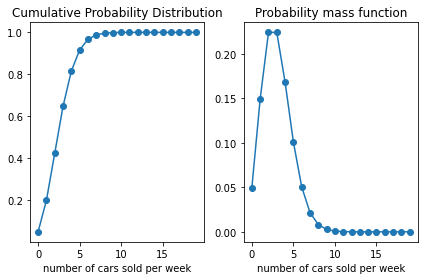

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2);
ax1.set_title("Cumulative Probability Distribution")
ax1.set_xlabel("number of cars sold per week");
ax1.plot(n,cumulative_dist,'o-');
ax2.set_title("Probability mass function");
ax2.set_xlabel("number of cars sold per week");
ax2.plot(n,poisson_dist,'o-');
fig.tight_layout()

## Question 4

#### Given Info:
percentage of orders that are accurate = 86.8%.
No of orders = 3

### A: Probability that all three orders are correct?

#### Solution :
- The probability follows <b>binomial distribution </b> because each order placed to a bot will be either correctly or incorrectly recognised. 

```
Probability that all three order are correct 
 =  P( 1st order correct) * P(2nd correct) * P(3rd order correct)
``` 
(We multiply them because they are independent events)

In [38]:
order  = np.arange(0,4);
p = 0.868;
binary_dist = stats.binom.pmf(order,3,p)
print("probability that all three orders are correct is ",binary_dist[3])

probability that all three orders are correct is  0.653972032


### B : Probability that none of three orders will be recognised correctly?

#### Solution : 
```
Probability that none of orders are correct 
    = P(1st incorrect) * P(2nd incorrect) * P(3rd incorrect)  
```

In [39]:
print("Probability that none are correct is ",binary_dist[0]);

Probability that none are correct is  0.002299968


### C: Probability that atleast two of three orders are correct?

#### Solution
```
Atleast two  = P (2 orders correct) + P (3 orders  correct) 
```

In [41]:
print("Probability that atleast two are correct is ",sum(binary_dist[2:]))

Probability that atleast two are correct is  0.9523279359999999


## Question 5 
#### Given Info: 
No of professionals= 300

Mean  = 60

Standard deviation = 12

Distribution is normal

### A: Percentage of students who score more than 80
#### Solution : 

probability that students are More than 80 =  1 - prob < 80

In [46]:
mean = 60
std= 12

In [47]:
#z = (x- mean) /std_deviation
x = 80
z = (80 - mean)/std
cdf_left = stats.norm.cdf(z); ## this give the prob of students who scores < 80
print("percentage of students who scored more than 80 is ",(1-cdf_left)*100)

percentage of students who scored more than 80 is  4.77903522728147


### B: Percentage of students whose score is < 50
#### Solution:


In [50]:
#step1 : compute z 
z = (50-mean)/std;
#Calculate prob 
prob  = stats.norm.cdf(z);
#print answer
print("percentaget of students who scored < 50 is ",(prob) * 100)

-0.8333333333333334
percentaget of students who scored < 50 is  20.232838096364308


### C: What is the distinction mark so that 10 % students are awarded?

#### Solution :

Lets say that the mark is X,

Probability of number of students that score atleast X is 10 % = 0.1

This value corresponds to the area under the curve from the score X and above.

To find X, consider the area under the curve for all values < X = 0.9

Objective: Find X

In [53]:
#computing z score based on probability
z = stats.norm.ppf(.9);
# z = (x-mean)/std => x = z*std +mean
X = z*std+ mean;
print("The distinction mark should be ",X);

The distinction mark should be  75.3786187865352


#### Let's verify our distinction mark by computing prob of students scoring > 75.37

In [56]:
print((1- stats.norm.cdf(75.37,mean, std)) * 100);

10.012610657277365


# PART II : PROJECT BASED